In [1]:
TIMESTAMP = '2020_02_20_14_05'
DATA_SET= 'hsa'


In [2]:
from utils import load_pickle, load_multiple_seq_align_fasta
import numpy as np

In [3]:
all_data_high = load_pickle('./data/{}/{}/all_data_ids_high.pickle'.format(DATA_SET, TIMESTAMP))
all_data_low = load_pickle('./data/{}/{}/all_data_ids_low.pickle'.format(DATA_SET, TIMESTAMP))

In [4]:
import cdr_annotation

In [5]:
fasta_high = './data/{}/{}/all_seq_high.fasta'.format(DATA_SET, TIMESTAMP)
with open(fasta_high, 'w') as the_file:
    for key, value in all_data_high.items():
        the_file.write('> {}\n{}\n'.format(key, value['seq'][0]))

fasta_low = './data/{}/{}/all_seq_low.fasta'.format(DATA_SET, TIMESTAMP)
with open(fasta_low, 'w') as the_file:
    for key, value in all_data_low.items():
        the_file.write('> {}\n{}\n'.format(key, value['seq'][0]))

In [5]:
from Bio.Align.Applications import ClustalOmegaCommandline

out_fasta_aligned_high = './data/{}/{}/all_seq_high_aligned.fasta'.format(DATA_SET, TIMESTAMP)
out_fasta_aligned_low= './data/{}/{}/all_seq_low_aligned.fasta'.format(DATA_SET, TIMESTAMP)

In [8]:
clustalomega_cline = ClustalOmegaCommandline(infile=fasta_high, outfile=out_fasta_aligned_high, verbose=True, auto=True)

In [ ]:
clustalomega_cline = ClustalOmegaCommandline(infile=fasta_low, outfile=out_fasta_aligned_low, verbose=True, auto=True)

In [6]:
import jerome_lib.sequence_logo as sequence_logo
import jerome_lib.utilities10 as utilities

from utils import le_align

/usr/lib/python3/dist-packages/numba/errors.py:104: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


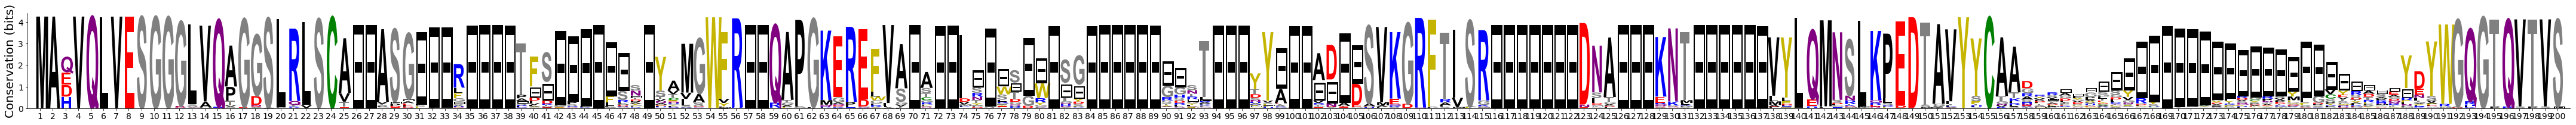

In [11]:
all_data = load_multiple_seq_align_fasta(out_fasta_aligned_high)
all_data_for_jer = (all_data-1)%21
a= all_data_for_jer.astype(np.int16)
mu = utilities.average(a, c=21)
fig=sequence_logo.Sequence_logo(mu, ticks_every=1);
fig.savefig('./data/{}/{}/high_align.png'.format(DATA_SET, TIMESTAMP))
avg_seq= np.argmax(mu, axis=1)
avg_seq_letter = le_align.inverse_transform((avg_seq+1)%21)
avg_seq_str_high = ''.join(avg_seq_letter)

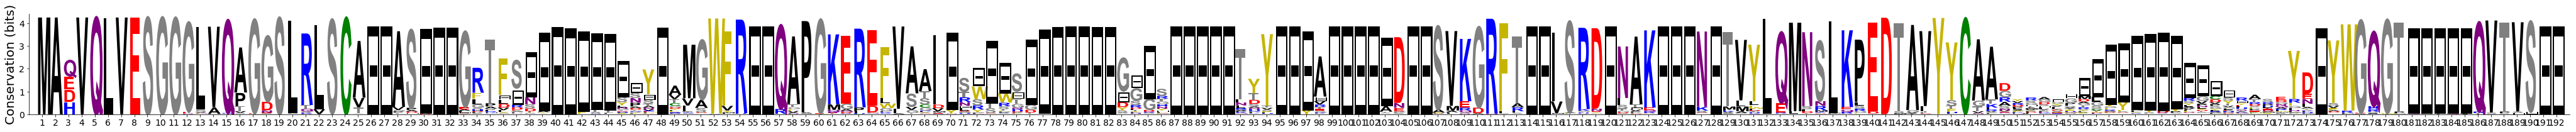

In [8]:
all_data = load_multiple_seq_align_fasta(out_fasta_aligned_low)
all_data_for_jer = (all_data-1)%21
a= all_data_for_jer.astype(np.int16)
mu = utilities.average(a, c=21)
sequence_logo.Sequence_logo(mu, ticks_every=1);
avg_seq= np.argmax(mu, axis=1)
avg_seq_letter = le_align.inverse_transform((avg_seq+1)%21)
avg_seq_str_low = ''.join(avg_seq_letter)

In [12]:
import re

In [13]:
r1 = re.search(r"W\w{1}R", avg_seq_str_low)

cdr1_low = (avg_seq_str_low.find('SC')+6, r1.start()) # CDR1 starts at 'S' + 6 and ends at 'W' - 1 
cdr2_low = (r1.start()+14, avg_seq_str_low.find('RF')-8) # CDR2 starts at 'W' + 14 and ends at 'R' - 8 
cdr3_low = (avg_seq_str_low.find('YYC')+3, avg_seq_str_low.find('GQG')-1) # CDR3 starts after YYC and ends at 'G' - 1 

r1 = re.search(r"W\w{1}R", avg_seq_str_high)

cdr1_high = (avg_seq_str_high.find('SC')+6, r1.start()) # CDR1 starts at 'S' + 6 and ends at 'W' - 1 
cdr2_high = (r1.start()+14, avg_seq_str_high.find('RF')-8) # CDR2 starts at 'W' + 14 and ends at 'R' - 8 
cdr3_high = (avg_seq_str_high.find('YYC')+3, avg_seq_str_high.find('GQG')-1) # CDR3 starts after YYC and ends at 'G' - 1 

In [14]:
from Bio import AlignIO
alignment_low = AlignIO.read(out_fasta_aligned_low, 'fasta')
alignment_high = AlignIO.read(out_fasta_aligned_high, 'fasta')

In [15]:
for row in alignment_low:
    tmp_cdr3 = cdr_annotation.find_cdr3(all_data_low[row.id]['seq'][0])
    tmp_cdr1 = cdr_annotation.find_cdr1(all_data_low[row.id]['seq'][0])
    tmp_cdr2 = cdr_annotation.find_cdr2(all_data_low[row.id]['seq'][0])
    all_data_low[row.id].update({
        'cdr3_align':str(row.seq)[cdr3_low[0]:cdr3_low[1]].replace('-',''),
        'cdr3_annotation':all_data_low[row.id]['seq'][0][tmp_cdr3[0]:tmp_cdr3[1]],
        'cdr1_align':str(row.seq)[cdr1_low[0]:cdr1_low[1]].replace('-',''),
        'cdr1_annotation':all_data_low[row.id]['seq'][0][tmp_cdr1[0]:tmp_cdr1[1]],
        'cdr2_align':str(row.seq)[cdr2_low[0]:cdr2_low[1]].replace('-',''),
        'cdr2_annotation':all_data_low[row.id]['seq'][0][tmp_cdr2[0]:tmp_cdr2[1]]
    })


In [16]:
for row in alignment_high:
    tmp_cdr3 = cdr_annotation.find_cdr3(all_data_high[row.id]['seq'][0])
    tmp_cdr1 = cdr_annotation.find_cdr1(all_data_high[row.id]['seq'][0])
    tmp_cdr2 = cdr_annotation.find_cdr2(all_data_high[row.id]['seq'][0])
    all_data_high[row.id].update({
        'cdr3_align':str(row.seq)[cdr3_high[0]:cdr3_high[1]].replace('-',''),
        'cdr3_annotation':all_data_high[row.id]['seq'][0][tmp_cdr3[0]:tmp_cdr3[1]],
        'cdr1_align':str(row.seq)[cdr1_high[0]:cdr1_high[1]].replace('-',''),
        'cdr1_annotation':all_data_high[row.id]['seq'][0][tmp_cdr1[0]:tmp_cdr1[1]],
        'cdr2_align':str(row.seq)[cdr2_high[0]:cdr2_high[1]].replace('-',''),
        'cdr2_annotation':all_data_high[row.id]['seq'][0][tmp_cdr2[0]:tmp_cdr2[1]]
    })


In [22]:

import csv
def dict_to_csv(d, csv_file):
    with open(csv_file, mode="w") as csv_out:
        my_writer = csv.writer(csv_out, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        my_writer.writerow(['id','seq','cdr1', 'cdr2','cdr3','cdr1_align', 'cdr2_align','cdr3_align','label'])
        for curr_id, val in d.items():
            line_to_add=[curr_id, val['seq'][0], 
                         val['cdr1_annotation'],val['cdr2_annotation'],val['cdr3_annotation'],
                         val['cdr1_align'],val['cdr2_align'],val['cdr3_align'],
                         val['labels'][0]]
            if line_to_add.__len__() == 9:
                my_writer.writerow(line_to_add)
            else:
                print(curr_id, line_to_add.__len__())

In [31]:
dict_to_csv(all_data_low,'./data/{}/{}/all_data_ids_low.csv'.format(DATA_SET, TIMESTAMP))
dict_to_csv(all_data_high,'./data/{}/{}/all_data_ids_high.csv'.format(DATA_SET, TIMESTAMP))



In [13]:
import numpy as np
from utils import le_align

In [15]:
cdr1_low = np.zeros(21)
cdr2_low = np.zeros(21)
cdr3_low = np.zeros(21)
for key, value in all_data_low.items():
    cdr1_encoded = le_align.transform(list(value['cdr1'][0]))
    cdr2_encoded = le_align.transform(list(value['cdr2'][0]))
    cdr3_encoded = le_align.transform(list(value['cdr3'][0]))
    for i in cdr1_encoded:
        cdr1_low[i]+=1
    for i in cdr2_encoded:
        cdr2_low[i]+=1
    for i in cdr3_encoded:
        cdr3_low[i]+=1

In [31]:
cdr1_high = np.zeros(21)
cdr2_high = np.zeros(21)
cdr3_high = np.zeros(21)
for key, value in all_data_high.items():
    cdr1_encoded = le_align.transform(list(value['cdr1'][0]))
    cdr2_encoded = le_align.transform(list(value['cdr2'][0]))
    cdr3_encoded = le_align.transform(list(value['cdr3'][0]))
    for i in cdr1_encoded:
        cdr1_high[i]+=1
    for i in cdr2_encoded:
        cdr2_high[i]+=1
    for i in cdr3_encoded:
        cdr3_high[i]+=1



In [17]:
cdr1_low = cdr1_low / all_data_low.__len__()
cdr2_low = cdr2_low / all_data_low.__len__()
cdr3_low = cdr3_low / all_data_low.__len__()

In [ ]:
cdr1_high = cdr1_high / all_data_high.__len__()
cdr2_high = cdr2_high / all_data_high.__len__()
cdr3_high = cdr3_high / all_data_high.__len__()

In [18]:
diff1 = (cdr1_high/cdr1_low)-1
diff2 = (cdr2_high/cdr2_low)-1
diff3 = (cdr3_high/cdr3_low)-1

/mnt/local-ssd/lirane/workspace/deepmhc2/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/mnt/local-ssd/lirane/workspace/deepmhc2/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/mnt/local-ssd/lirane/workspace/deepmhc2/venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
print("CDR 1 - low/high diff")
print(np.sort(diff1))
print(le_align.inverse_transform(np.argsort(diff1)))
print()
print("CDR 2 - low/high diff")
print(np.sort(diff2))
print(le_align.inverse_transform(np.argsort(diff2)))
print()
print("CDR 3 - low/high diff")
print(np.sort(diff3))
print(le_align.inverse_transform(np.argsort(diff3)))
print()



CDR 1 - low/high diff
[-0.25466732 -0.14293156 -0.11775402 -0.11530162 -0.09942473 -0.07418626
 -0.03806895 -0.03789166 -0.01878304 -0.01257174  0.00058172  0.0026215
  0.03636602  0.05770602  0.06236492  0.0644553   0.0848789   0.08918494
  0.09516139  0.11621077         nan]
['E' 'C' 'N' 'W' 'D' 'T' 'H' 'V' 'G' 'M' 'F' 'R' 'L' 'A' 'P' 'Y' 'S' 'Q'
 'K' 'I' '-']

CDR 2 - low/high diff
[-0.1728293  -0.14812359 -0.14749103 -0.06703535 -0.03437081 -0.00325955
  0.00230177  0.00497163  0.00714681  0.0181607   0.02456928  0.04238477
  0.07830129  0.07930982  0.08869451  0.10735365  0.12575281  0.13296684
  0.13717512  0.22636085         nan]
['K' 'F' 'L' 'A' 'G' 'T' 'S' 'H' 'R' 'I' 'Y' 'D' 'W' 'P' 'V' 'M' 'E' 'Q'
 'N' 'C' '-']

CDR 3 - low/high diff
[-0.27028799 -0.1329025  -0.10930046 -0.0825685  -0.06225564 -0.04194828
 -0.02535111 -0.02323429 -0.01240663 -0.01128081  0.00560961  0.00755933
  0.01620742  0.01865196  0.02903346  0.06518569  0.07318105  0.0990941
  0.13937379  0.17722025   

In [18]:
cdr1_low = np.zeros(21)
cdr2_low = np.zeros(21)
cdr3_low = np.zeros(21)
all_cdr1_low = 0
all_cdr2_low = 0
all_cdr3_low = 0

cdr1_high = np.zeros(21)
cdr2_high = np.zeros(21)
cdr3_high = np.zeros(21)
all_cdr1_high = 0
all_cdr2_high = 0
all_cdr3_high = 0
for key, value in all_data_high.items():
    if value['labels'][0]==2:
        all_cdr1_high += len(value['cdr1'][0])
        all_cdr2_high += len(value['cdr2'][0])
        all_cdr3_high += len(value['cdr3'][0])
        cdr1_encoded = le_align.transform(list(value['cdr1'][0]))
        cdr2_encoded = le_align.transform(list(value['cdr2'][0]))
        cdr3_encoded = le_align.transform(list(value['cdr3'][0]))
        for i in cdr1_encoded:
            cdr1_high[i]+=1
        for i in cdr2_encoded:
            cdr2_high[i]+=1
        for i in cdr3_encoded:
            cdr3_high[i]+=1
    if value['labels'][0]==0:
        all_cdr1_low += len(value['cdr1'][0])
        all_cdr2_low += len(value['cdr2'][0])
        all_cdr3_low += len(value['cdr3'][0])
        cdr1_encoded = le_align.transform(list(value['cdr1'][0]))
        cdr2_encoded = le_align.transform(list(value['cdr2'][0]))
        cdr3_encoded = le_align.transform(list(value['cdr3'][0]))
        for i in cdr1_encoded:
            cdr1_low[i]+=1
        for i in cdr2_encoded:
            cdr2_low[i]+=1
        for i in cdr3_encoded:
            cdr3_low[i]+=1


In [40]:
cdr1_low_norm = cdr1_low / all_cdr1_low
cdr2_low_norm = cdr2_low / all_cdr2_low
cdr3_low_norm = cdr3_low / all_cdr3_low
cdr1_high_norm = cdr1_high / all_cdr1_high
cdr2_high_norm = cdr2_high / all_cdr2_high
cdr3_high_norm = cdr3_high / all_cdr3_high



In [41]:
diff1 = (cdr1_high_norm-cdr1_low_norm)
diff2 = (cdr2_high_norm-cdr2_low_norm)
diff3 = (cdr3_high_norm-cdr3_low_norm)

In [29]:
print("CDR 1 - low/high diff")
print(np.sort(diff1))
print(le_align.inverse_transform(np.argsort(diff1)))
print()
print("CDR 2 - low/high diff")
print(np.sort(diff2))
print(le_align.inverse_transform(np.argsort(diff2)))
print()
print("CDR 3 - low/high diff")
print(np.sort(diff3))
print(le_align.inverse_transform(np.argsort(diff3)))
print()




CDR 1 - low/high diff
[-6.55104881e-02 -3.32480994e-02 -2.16511030e-02 -2.05238507e-02
 -1.96593941e-02 -1.27364724e-02 -7.86007781e-03 -3.35078298e-03
 -2.44769241e-03 -1.12448656e-03 -6.97872703e-05  0.00000000e+00
  1.60540622e-03  2.22409662e-03  6.92775048e-03  1.49689952e-02
  2.42658914e-02  2.56218735e-02  2.96878411e-02  3.16781722e-02
  5.12022080e-02]
['A' 'D' 'R' 'L' 'V' 'I' 'Y' 'E' 'G' 'Q' 'H' '-' 'K' 'W' 'C' 'N' 'P' 'S'
 'F' 'M' 'T']

CDR 2 - low/high diff
[-0.02648123 -0.01592706 -0.01377676 -0.01287024 -0.01068168 -0.01050173
 -0.00440588 -0.00063277 -0.00041502  0.          0.00067169  0.00214071
  0.00252909  0.00272423  0.00314342  0.00351845  0.00583146  0.00905706
  0.01715813  0.02084095  0.02807719]
['R' 'N' 'I' 'C' 'W' 'S' 'F' 'P' 'V' '-' 'E' 'A' 'K' 'Q' 'H' 'M' 'Y' 'D'
 'T' 'L' 'G']

CDR 3 - low/high diff
[-0.03767929 -0.03602488 -0.0326793  -0.01977992 -0.01778452 -0.01189964
 -0.01185728 -0.01082045 -0.00916963 -0.00102508  0.          0.00041812
  0.00048843

In [30]:


print("CDR 3 - low")
print(cdr3_low_norm)
print(le_align.inverse_transform(list(range(21))))
print()

print("CDR 3 - high")
print(cdr3_high_norm)
print(le_align.inverse_transform(list(range(21))))
print()

CDR 3 - low
[0.         0.07284955 0.0113502  0.13397822 0.04893118 0.03383877
 0.05140245 0.02849023 0.03233835 0.00325678 0.06185239 0.02702512
 0.01578966 0.03920496 0.01285061 0.06244373 0.06450019 0.07592099
 0.07788918 0.00864945 0.137438  ]
['-' 'A' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'K' 'L' 'M' 'N' 'P' 'Q' 'R' 'S' 'T'
 'V' 'W' 'Y']

CDR 3 - high
[0.         0.06094991 0.01032512 0.10129892 0.04941961 0.02301832
 0.10218695 0.01663295 0.01455384 0.01174879 0.05268277 0.0072452
 0.04002481 0.03962308 0.02048109 0.10067166 0.08797846 0.0382417
 0.0418643  0.01214347 0.16890906]
['-' 'A' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'K' 'L' 'M' 'N' 'P' 'Q' 'R' 'S' 'T'
 'V' 'W' 'Y']



In [23]:


(cdr3_high_norm/cdr3_low_norm)-1




/mnt/local-ssd/lirane/workspace/deepmhc2/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


array([        nan, -0.16334543, -0.09031376, -0.243915  ,  0.00998205,
       -0.31976489,  0.98797836, -0.41618742, -0.54995125,  2.60748225,
       -0.14825013, -0.73190859,  1.53487471,  0.01066507,  0.59378305,
        0.61219796,  0.36400324, -0.49629609, -0.46251456,  0.40395818,
        0.22898372])

In [42]:
ratio1 = (cdr1_high_norm/cdr1_low_norm)-1
ratio2 = (cdr2_high_norm/cdr2_low_norm)-1
ratio3 = (cdr3_high_norm/cdr3_low_norm)-1

/mnt/local-ssd/lirane/workspace/deepmhc2/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/mnt/local-ssd/lirane/workspace/deepmhc2/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/mnt/local-ssd/lirane/workspace/deepmhc2/venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
print("CDR 1 - low/high diff")
print(np.sort(ratio1))
print(le_align.inverse_transform(np.argsort(ratio1)))
print()
print("CDR 2 - low/high diff")
print(np.sort(ratio2))
print(le_align.inverse_transform(np.argsort(ratio2)))
print()
print("CDR 3 - low/high diff")
print(np.sort(ratio3))
print(le_align.inverse_transform(np.argsort(ratio3)))
print()

CDR 1 - low/high diff
[-0.68716838 -0.62838418 -0.57859332 -0.57029971 -0.50865696 -0.38823551
 -0.37090415 -0.22898352 -0.08703053 -0.02261103 -0.01041372  0.21629095
  0.36931375  0.4742487   0.520499    0.80442678  1.05710489  1.83948018
  1.93418748  3.10852524         nan]
['Q' 'D' 'A' 'E' 'L' 'I' 'V' 'R' 'Y' 'G' 'H' 'S' 'F' 'M' 'T' 'N' 'W' 'K'
 'P' 'C' '-']

CDR 2 - low/high diff
[-0.74285554 -0.53491163 -0.33750748 -0.31879927 -0.17541327 -0.12538689
 -0.12308817 -0.05897132 -0.03855477  0.03649051  0.07898323  0.11198668
  0.11592742  0.18600881  0.22360459  0.23499304  1.14897185  1.84454016
  2.5281481   5.66624347         nan]
['C' 'F' 'R' 'N' 'W' 'I' 'P' 'S' 'V' 'A' 'Y' 'T' 'E' 'H' 'G' 'D' 'K' 'Q'
 'M' 'L' '-']

CDR 3 - low/high diff
[-0.73190859 -0.54995125 -0.49629609 -0.46251456 -0.41618742 -0.31976489
 -0.243915   -0.16334543 -0.14825013 -0.09031376  0.00998205  0.01066507
  0.22898372  0.36400324  0.40395818  0.59378305  0.61219796  0.98797836
  1.53487471  2.60748225 

In [39]:
with open('./data/{}/{}/cdr_stat.txt'.format(DATA_SET, TIMESTAMP),'w') as f:
    f.write("CDR 1 - low\n")
    f.write(np.array2string(cdr1_low_norm, 
                            precision=2, 
                            separator=',',
                            suppress_small=True))
    f.write('\n')
    f.write(" ".join(le_align.inverse_transform(list(range(21)))))
    f.write('\n')
    f.write("CDR 1 - high")
    f.write('\n')
    f.write(np.array2string(cdr1_high_norm, 
                           precision=2, 
                           separator=',',
                           suppress_small=True))
    f.write('\n')
    
    f.write("CDR 2 - low\n")
    f.write(np.array2string(cdr2_low_norm, 
                            precision=2, 
                            separator=',',
                            suppress_small=True))
    f.write('\n')
    f.write(" ".join(le_align.inverse_transform(list(range(21)))))
    f.write('\n')
    f.write("CDR 2 - high")
    f.write('\n')
    f.write(np.array2string(cdr2_high_norm, 
                           precision=2, 
                           separator=',',
                           suppress_small=True))
    f.write('\n')
    
    f.write("CDR 3 - low\n")
    f.write(np.array2string(cdr3_low_norm, 
                            precision=2, 
                            separator=',',
                            suppress_small=True))
    f.write('\n')
    f.write(" ".join(le_align.inverse_transform(list(range(21)))))
    f.write('\n')
    f.write("CDR 3 - high")
    f.write('\n')
    f.write(np.array2string(cdr3_high_norm, 
                           precision=2, 
                           separator=',',
                           suppress_small=True))
    f.write('\n')
    
    
    
    f.write("CDR 1 - high-low diff\n")
    f.write(np.array2string(np.sort(diff1), 
                                       precision=2, 
                                       separator=',',
                                       suppress_small=True))
    f.write('\n')

    f.write(" ".join(le_align.inverse_transform(np.argsort(diff1))))
    f.write('\n')
    f.write("CDR 2 - high-low diff\n")
    f.write(np.array2string(np.sort(diff2), 
                                           precision=2, 
                                           separator=',',
                                           suppress_small=True))
    f.write('\n')

    f.write(" ".join(le_align.inverse_transform(np.argsort(diff2))))
    f.write('\n')
    f.write("CDR 3 - high-low diff\n")
    f.write(np.array2string(np.sort(diff3), 
                                               precision=2, 
                                               separator=',',
                                               suppress_small=True))
    f.write(" ".join(le_align.inverse_transform(np.argsort(diff3))))
    f.write('\n')
    f.write("CDR 1 - low/high ratio\n")
    f.write(np.array2string(np.sort(ratio1), 
                                                   precision=2, 
                                                   separator=',',
                                                   suppress_small=True))
    f.write('\n')

    f.write(" ".join(le_align.inverse_transform(np.argsort(ratio1))))
    f.write('\n')
    f.write("CDR 2 - low/high ratio\n")
    f.write(np.array2string(np.sort(ratio2), 
                                                       precision=2, 
                                                       separator=',',
                                                       suppress_small=True))
    f.write('\n')

    f.write(" ".join(le_align.inverse_transform(np.argsort(ratio2))))
    f.write('\n')
    f.write("CDR 3 - low/high ratio\n")
    f.write(np.array2string(np.sort(ratio3), 
                                                       precision=2, 
                                                       separator=',',
                                                       suppress_small=True))
    f.write('\n')

    f.write(" ".join(le_align.inverse_transform(np.argsort(ratio3))))
    f.write('\n')